# <center> Prediction Of Water Point Functionality in Nigeria </center> 

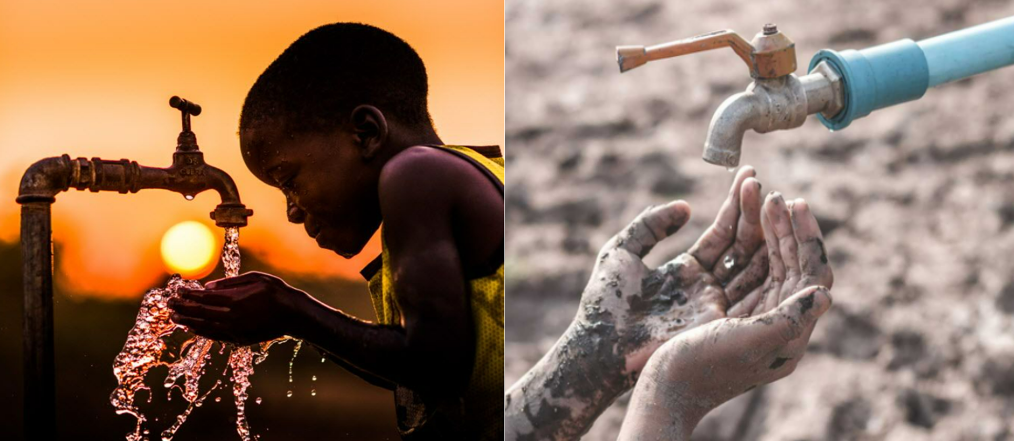

Water is an important resource to mankind. The availability of clean and sanitary water is critical to the economic development and livelihood of the community. However, in many parts of the world, an especially developing country, clean water accessibility is still a worrying matter as a large portion of population does not have access to clean water. In Nigeria, only 19% of Nigeria’s population has access to safe drinking water, with 67% has basic water supply. In city areas, 82% of people have basic water supply, but only 54% in rural area do.<br><br>

In developing countries where resources are not abundant, there are many water points which are no longer functional to support the economy and human life. With limited resources, the government needs to accurately pin-point the non-functional water points to rehabilitate them; hence it is important to identify factors which influence water system functionality. Some important factors in their analysis are fee collection status, management agencies, and geographical locations.<br><br>

The objective of this study is to build a predictive model to predict Non-Functional water points in Nigeria based on predictors such as water management records, population data, geographical location of the water points, etc. The Functional/Non-Functional characteristics will allow Nigerian government and private water supply companies in planning to rehabilitate Non-functional water points, thus improve the availability of clean and sanitary water to the communities in Nigeria.<br><br>

Three main families of models are used in this work, Naive Bayes (Generative Models), Logistic Regression (Linear Model) and Decision Tree/Ensemble Trees (RandomForest/AdaBoost/XgBoost). Several models were built and the best model chosen based on Accuracy, F1 Score and AUC Score.

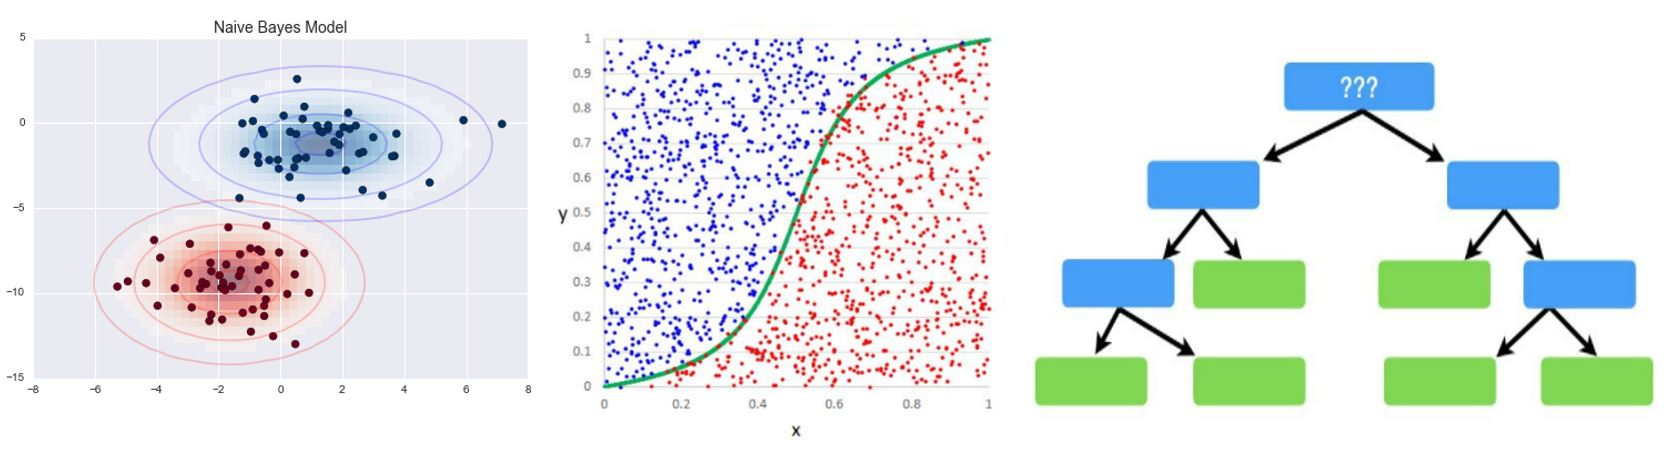

##  Table of Content

#### Data Cleaning & Preprocessing
- [Import Data](#import_data)
- [Data Preprocessing](#preprocessing)
- [Multivariate Analysis](#multivariate)
- [Recategorize data with skewed distribution](#recode)
- [Impute Data using RandomForest](#missing)

#### Model Building and Evaluation
- [Logistic Regression](#lr)
- [Naive Bayes Classifier](#nb)
- [Tree Based Classifier](#tree)
    - [Decision Tree Classifier](#dtree)
    - [Bagging Classifiers](#bag)
    - [Boosted Trees](#boost)
     
#### Conclusion

# Data Cleaning & Preprocessing

### Import Data  <a id='import_data'/>

The data is taken from the official <a href=https://www.waterpointdata.org/>WPdx Repository</a>. The description of the attributes can be referred at <a href=https://www.waterpointdata.org/wp-content/uploads/2021/04/WPDx_Data_Standard.pdf>WPdx Description</a> . The original dataset contains 65 columns and 512384 data points. We extracted from original dataset all data points in Nigeria, which consists of 89774 data points.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import tree, model_selection, metrics, datasets, linear_model, ensemble
import seaborn as sns
from Association import Chisq_Stats

In [2]:
data = pd.read_csv('Nigeria.csv')
data

,row_id,source,lat_deg,lon_deg,report_date,status_id,water_source_clean,water_source_category,water_tech_clean,water_tech_category,...,adm2,adm3,clean_country_id,management,created_timestamp,updated_timestamp,New Georeferenced Column,lat_lon_deg,count,converted
0,113459,"Federal Ministry of Water Resources, Nigeria",12.631068,8.706313,01/18/2015 12:00:00 AM,No,Borehole,Well,Hand Pump,Hand Pump,...,Babura,NaN,NGA,NaN,06/30/2020 12:56:07 PM,06/30/2020 12:56:07 PM,POINT (8.7063133 12.631068),"(12.631068°, 8.7063133°)",1,"#status_id, #water_source, #pay, #status, #man..."
1,114201,"Federal Ministry of Water Resources, Nigeria",12.667240,8.174235,1/11/2015 0:00,No,Borehole,Well,Hand Pump,Hand Pump,...,Roni,NaN,NGA,Other,06/30/2020 12:56:07 PM,06/30/2020 12:56:07 PM,POINT (8.1742349 12.66724),"(12.66724°, 8.1742349°)",1,"#status_id, #water_source, #pay, #status, #man..."
2,176578,"Federal Ministry of Water Resources, Nigeria",7.298365,4.269078,05/13/2015 12:00:00 AM,Yes,Borehole,Well,Hand Pump,Hand Pump,...,Isokan,NaN,NGA,NaN,06/30/2020 12:56:07 PM,06/30/2020 12:56:07 PM,POINT (4.2690783 7.298365),"(7.298365°, 4.2690783°)",1,"#status_id, #water_source, #pay, #status, #man..."
3,178455,"Federal Ministry of Water Resources, Nigeria",7.589328,4.395743,5/9/2015 0:00,No,Borehole,Well,Hand Pump,Hand Pump,...,Aiyedade,NaN,NGA,NaN,06/30/2020 12:56:07 PM,06/30/2020 12:56:07 PM,POINT (4.3957426 7.5893277),"(7.5893277°, 4.3957426°)",1,"#status_id, #water_source, #pay, #status, #man..."
4,59507,"Federal Ministry of Water Resources, Nigeria",9.018561,9.287233,01/27/2015 12:00:00 AM,No,Borehole,Well,Hand Pump,Hand Pump,...,Qua'An Pan,NaN,NGA,NaN,06/30/2020 12:56:07 PM,06/30/2020 12:56:07 PM,POINT (9.2872328 9.0185612),"(9.0185612°, 9.2872328°)",1,"#status_id, #water_source, #pay, #status, #man..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29161,159946,"Federal Ministry of Water Resources, Nigeria",7.651615,5.326785,01/27/2015 12:00:00 AM,No,Borehole,Well,Hand Pump,Hand Pump,...,Ado,NaN,NGA,NaN,06/30/2020 12:56:07 PM,06/30/2020 12:56:07 PM,POINT (5.326785 7.651615),"(7.651615°, 5.326785°)",1,"#status_id, #water_source, #pay, #status, #man..."
29162,159885,"Federal Ministry of Water Resources, Nigeria",7.726445,5.180953,01/17/2015 12:00:00 AM,No,Borehole,Well,Hand Pump,Hand Pump,...,Irepodun,NaN,NGA,Community Management,06/30/2020 12:56:07 PM,06/30/2020 12:56:07 PM,POINT (5.1809533 7.7264451),"(7.7264451°, 5.1809533°)",1,"#status_id, #water_source, #pay, #status, #man..."
29163,162644,"Federal Ministry of Water Resources, Nigeria",11.060808,5.606240,12/2/2015 0:00,Yes,Borehole,Well,Mechanized Pump,Mechanized Pump,...,Koko/Besse,NaN,NGA,Institutional Management - School,06/30/2020 12:56:07 PM,06/30/2020 12:56:07 PM,POINT (5.60624 11.060808),"(11.060808°, 5.60624°)",1,"#status_id, #water_source, #pay, #status, #man..."
29164,157728,"Federal Ministry of Water Resources, Nigeria",7.443512,4.089562,1/8/2015 0:00,Yes,Protected Shallow Well,Well,Hand Pump,Hand Pump,...,Egbeda,NaN,NGA,NaN,06/30/2020 12:56:07 PM,06/30/2020 12:56:07 PM,POINT (4.0895621 7.4435116),"(7.4435116°, 4.0895621°)",1,"#status_id, #water_source, #pay, #status, #man..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29166 entries, 0 to 29165
Data columns (total 65 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   row_id                      29166 non-null  int64  
 1   source                      29166 non-null  object 
 2   lat_deg                     29166 non-null  float64
 3   lon_deg                     29166 non-null  float64
 4   report_date                 29166 non-null  object 
 5   status_id                   29166 non-null  object 
 6   water_source_clean          29166 non-null  object 
 7   water_source_category       29166 non-null  object 
 8   water_tech_clean            28771 non-null  object 
 9   water_tech_category         28771 non-null  object 
 10  facility_type               29166 non-null  object 
 11  clean_country_name          29166 non-null  object 
 12  clean_adm1                  29166 non-null  object 
 13  clean_adm2                  291

Original dataset contains 65 variables, with several variables not related to the status of water point function/non-functional. Some variables such as scheme_id and adm3 contains no data or very few data points. Some columns such as Row_ID, source, activity_id, etc are unique to each sample and not very meaningful to the predictive model. Hence we excluded these features from the predictive model.

### Data Cleaning and Preprocessing  <a id = 'preprocessing'/>

In [4]:
## Remove unused attributes
useless_attributes = ['row_id','source','clean_country_name','clean_adm2','clean_adm3',
                      'activity_id','scheme_id', 'wpdx_id', 'notes', 'orig_lnk',
                      'photo_lnk','country_id', 'data_lnk', 'public_data_source',
                      'latest_record', 'location_id','lat_deg_original',
                      'lon_deg_original','country_name','adm2', 'adm3',
                      'clean_country_id','management','created_timestamp', 
                      'updated_timestamp', 'New Georeferenced Column ',
                      'lat_lon_deg', 'count', 'converted','water_source',
                      'water_tech', 'adm1','report_date','status']

for i in useless_attributes:
    data.drop(columns = i, inplace = True)
    
## Remove columns with too many missing data
nulldata = data.isnull().sum()
missing_cols = nulldata[nulldata > len(data)/2].index

for i in missing_cols:
    data.drop(columns = i, inplace = True)

In [5]:
## Recategorize data
# Region
region_data = pd.read_csv('recode_region.csv')
region_dict = {}
for i in range(len(region_data)):
    region_dict[region_data['clean_adm1'][i]] = region_data['clean_adm1 recoded'][i]
data['region'] = data['clean_adm1'].apply(lambda x: region_dict[x])
data.drop(columns = 'clean_adm1',inplace = True)

# Pay
data['pay'] = data['pay'].apply(lambda x: x if x == 'No' else 'Yes')

### Multivariate Analysis <a id = 'multivariate'/>
Multicollinearity Issue is a common problem which many Machine Learning model types suffer from. This issue happens when predicts are highly correlated to each other, i.e. when one predictor increases, other predictors also increases (positive correlation) or decreases (negative correlation). Many models such as Naive Bayes models or Logistic Regression need the assumption that predictors are independent of each other for the models to work well. Tree-based methods, however, do not require predictors to be independent. In most datasets, features have certain degrees of multicollinearity. Therefore before building Naive Bayes or Logistic Regression models, we remove features which are highly correlated to each other. <br>
#### Continuous Variable using Pearson Correlation Value
For Continuous Variables, we use Pearson Correlation to check the degree of multicollinearity. The equation to calculate the Pearson Correlation between variable X and variable Y is: <br> <br>
<center>$\large\rho(X,Y) = \frac{COV(X,Y)}{\rho_X\rho_Y} = \frac{E[(X-\mu_x)(Y-\mu_y)]}{\rho_X\rho_Y}$ <br><br></center>
For parameter pairs with Pearson Correlation factor of 0.8 and above, we consider them highly correlated and drop either one of the variables. <br> 

In [8]:
data

,lat_deg,lon_deg,status_id,water_source_clean,water_source_category,water_tech_clean,water_tech_category,facility_type,install_year,management_clean,...,distance_to_city,distance_to_town,served_population,local_population_1km,crucialness,pressure,usage_capacity,is_urban,cluster_size,region
0,12.631068,8.706313,No,Borehole,Well,Hand Pump,Hand Pump,Improved,NaN,NaN,...,46457.43224,26637.493840,9.0,75.0,0.120000,0.018,500.0,False,1,North West
1,12.667240,8.174235,No,Borehole,Well,Hand Pump,Hand Pump,Improved,2014.0,Other,...,84158.03408,26175.705470,37.0,190.0,0.194737,0.074,500.0,False,1,North West
2,7.298365,4.269078,Yes,Borehole,Well,Hand Pump,Hand Pump,Improved,2014.0,NaN,...,37162.97409,11056.563120,0.0,0.0,NaN,NaN,500.0,False,2,South West
3,7.589328,4.395743,No,Borehole,Well,Hand Pump,Hand Pump,Improved,2011.0,NaN,...,20921.99254,20254.115430,0.0,0.0,NaN,NaN,500.0,False,1,South West
4,9.018561,9.287233,No,Borehole,Well,Hand Pump,Hand Pump,Improved,2007.0,NaN,...,102783.51800,64452.261770,525.0,1504.0,0.349069,1.050,500.0,False,1,North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29161,7.651615,5.326785,No,Borehole,Well,Hand Pump,Hand Pump,Improved,NaN,NaN,...,11901.11108,7898.366006,29.0,144.0,0.201389,0.058,500.0,False,2,South West
29162,7.726445,5.180953,No,Borehole,Well,Hand Pump,Hand Pump,Improved,2012.0,Community Management,...,12308.95991,8867.455911,287.0,1126.0,0.254885,0.574,500.0,False,1,South West
29163,11.060808,5.606240,Yes,Borehole,Well,Mechanized Pump,Mechanized Pump,Improved,NaN,School Management,...,189935.26220,1270.541921,1026.0,1026.0,1.000000,1.026,1000.0,False,1,North West
29164,7.443512,4.089562,Yes,Protected Shallow Well,Well,Hand Pump,Hand Pump,Improved,2004.0,NaN,...,22441.80307,14632.829640,87.0,346.0,0.251445,0.174,500.0,False,1,South West


Text(0.5, 1.0, 'Multivariate Analysis (Pearson Correlation) for continuous variables')

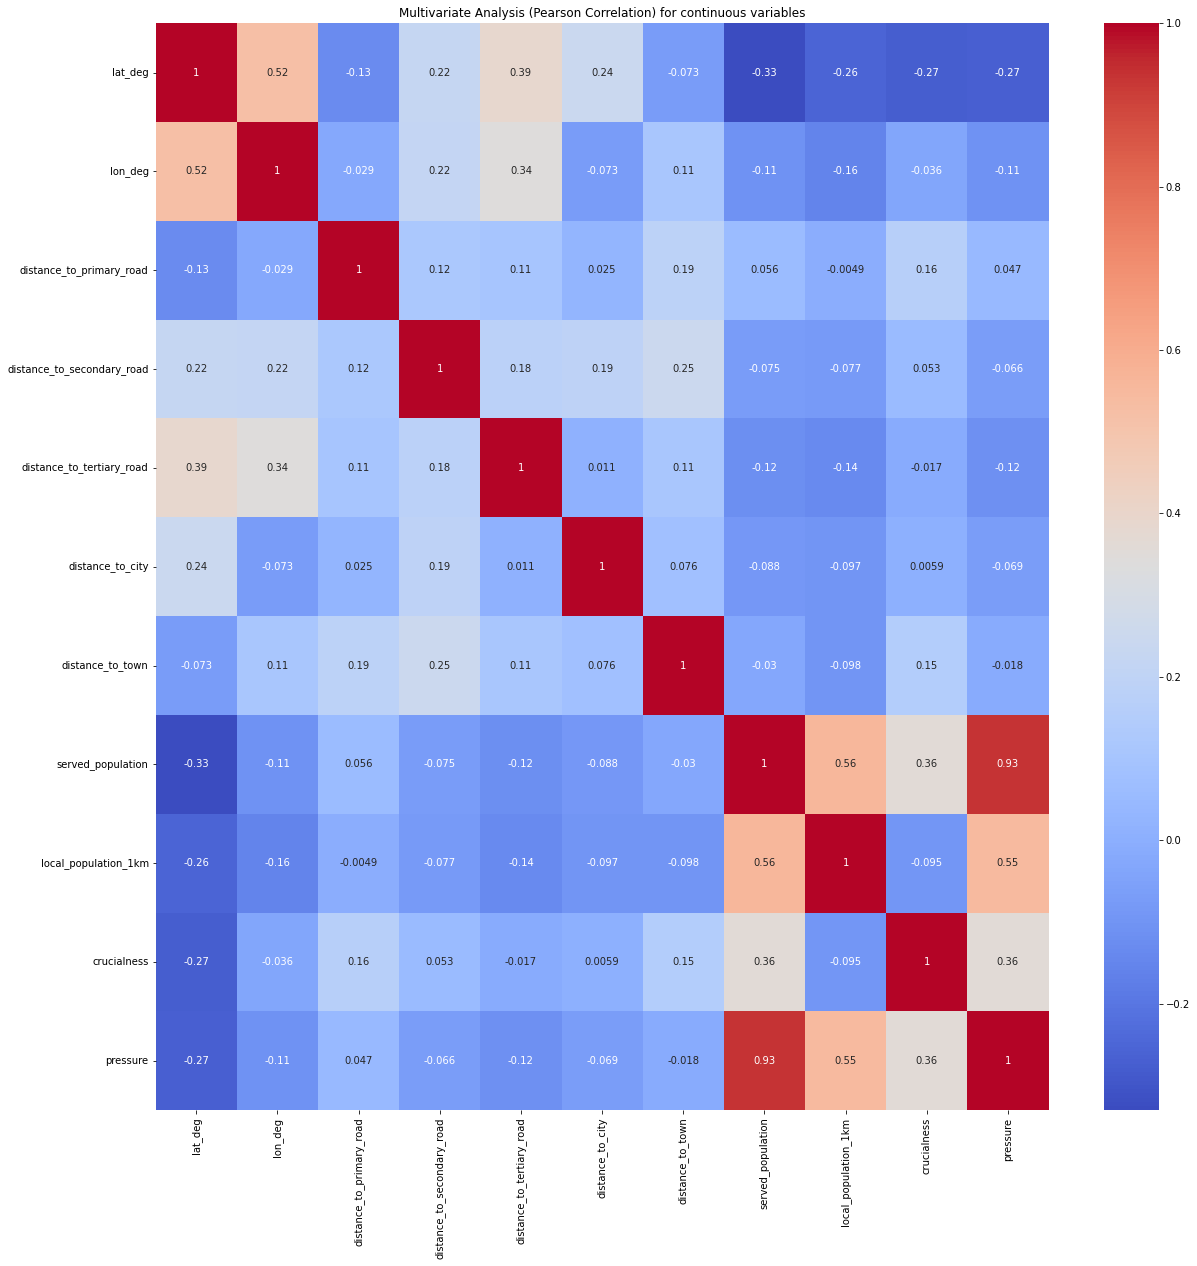

In [7]:
# Multivariate Analysis
conti_var = ['lat_deg', 'lon_deg','distance_to_primary_road',
             'distance_to_secondary_road', 'distance_to_tertiary_road',
             'distance_to_city', 'distance_to_town','served_population',
             'local_population_1km', 'crucialness', 'pressure']

pearson_corr = data[conti_var].corr()
plt.figure(figsize = (20,20))
sns.heatmap(pearson_corr,annot = True,cmap='coolwarm')
plt.title("Multivariate Analysis (Pearson Correlation) for continuous variables")

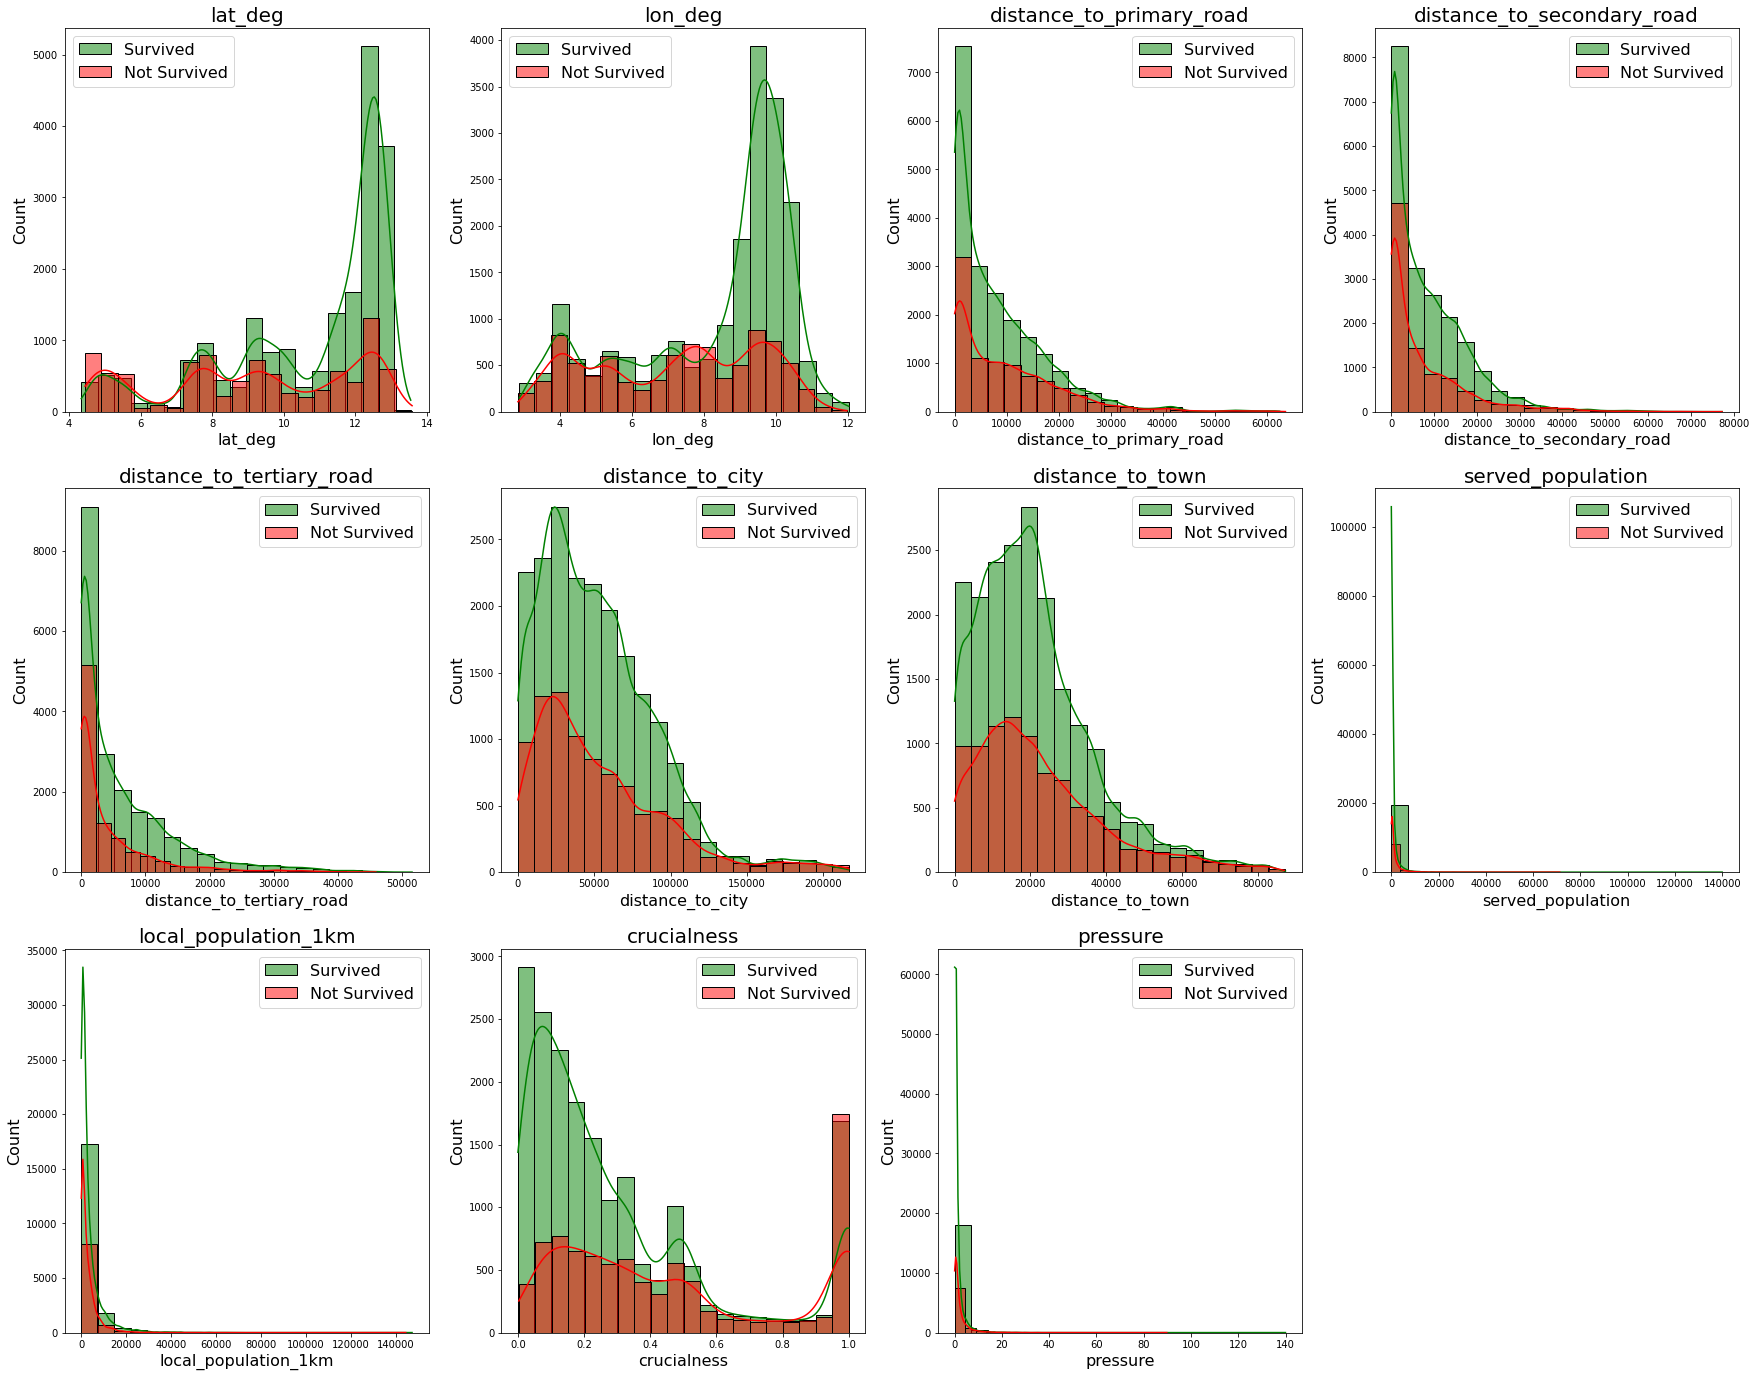

In [14]:
plt.figure(figsize = (30,24))
ind = 0
while ind <= 10:
    plt.subplot(3,4,ind+1)
    sns.histplot(x = conti_var[ind], bins = 20, data = data[data['status_id'] == "Yes"][conti_var], 
                color = 'green', alpha = 0.5, kde = 'False', label = 'Survived')
    sns.histplot(x = conti_var[ind], bins = 20, data = data[data['status_id'] == "No"][conti_var],
                color = 'red', alpha = 0.5, kde = 'False', label = 'Not Survived')
    plt.title(conti_var[ind], fontsize = 20)
    plt.xlabel(conti_var[ind], fontsize = 16)
    plt.ylabel("Count", fontsize = 16)
    plt.legend(fontsize = 16)
    ind += 1

It can be observed from the Pearson correlation matrix that this is a symmetric matrix, hence we only need to see the bottom or top triangle of this matrix. The diagonal is the correlation of a variable with itself, which is 1. <br>
From the matrix, it can be seen that served_population and pressure are highly correlated ($\large\rho$ = 0.93). We choose to exclude pressure as 10% of the data points are Missing, compared to served_population.

#### Variance Inflation Factor VIF <br> <br>
Another approach to detect multicollinearity issue is to use Variance Inflation Factor VIF. For the case of Pearson correlation factor, we can only detect if there is high correlation between 2 variables, but we cannot detect if a combination of 3 or more variables suffer from multicollinearity issue. VIF factor allows us to do this, as it basically perform linear regression of the interested feature against the remaining features in the dataset. The formula to calculate VIF Variance Inflation Factor is <br><br>
<center> $  VIF = \large\frac{1}{1-R^2}$ <br> <br> </center>
where $R^2$ is the coefficient of determination for the linear regression between the interested feature against the remaining features whose value is between 0 and 1.<br><br>

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data[conti_var].dropna().values, i) for i in range(data[conti_var].shape[1])]
vif["features"] = data[conti_var].columns
vif = vif.sort_values(by = 'VIF Factor',ascending = False)

Text(0, 0.5, 'Features')

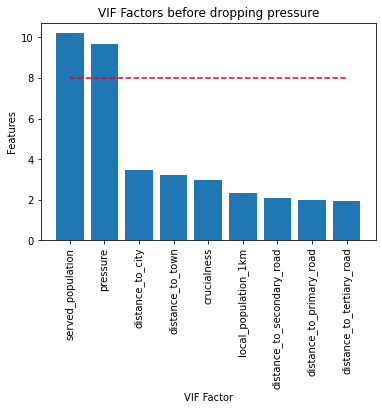

In [30]:
plt.bar(vif["features"][2:], vif["VIF Factor"][2:])
plt.plot([8] * len(vif["features"][2:]), color = "red", linestyle = "dashed")
plt.xticks(rotation=90)
plt.title("VIF Factors before dropping pressure")
plt.xlabel("VIF Factor")
plt.ylabel("Features")

From the table of VIF Factor, we can see that aside from lat_deg and lon_deg, served_population and pressure are the top two features with the highest correlation with the remaining features. We already know that these 2 features are highly correlated to each other from the Pearson correaltion matrix above.

In [31]:
## High correlation between pressure and served_population - Drop pressure
data.drop(columns = 'pressure', inplace = True)

In [33]:
conti_var = ['lat_deg', 'lon_deg','distance_to_primary_road',
             'distance_to_secondary_road', 'distance_to_tertiary_road',
             'distance_to_city', 'distance_to_town','served_population',
             'local_population_1km', 'crucialness']
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data[conti_var].dropna().values, i) for i in range(data[conti_var].shape[1])]
vif["features"] = data[conti_var].columns
vif = vif.sort_values(by = 'VIF Factor',ascending = False)

Text(0, 0.5, 'Features')

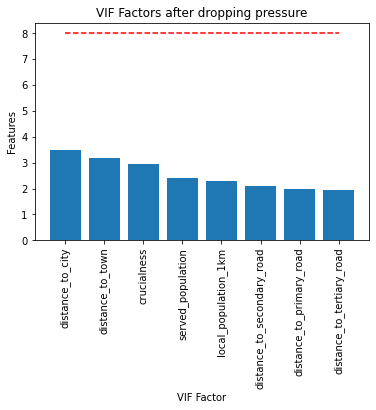

In [35]:
plt.bar(vif["features"][2:], vif["VIF Factor"][2:])
plt.plot([8] * len(vif["features"][2:]), color = "red", linestyle = "dashed")
plt.xticks(rotation=90)
plt.title("VIF Factors after dropping pressure")
plt.xlabel("VIF Factor")
plt.ylabel("Features")

It can be observed that after dropping variable pressure, the VIF Factor for served_population has dropped down from 9.67 to 2.40.

#### Multicollinearity Issue for Categorical Variables with Crimer's V Coefficients

In [36]:
## Chi-Square Test & recode
cat_var = ['water_source_clean','water_source_category', 'water_tech_clean',
           'water_tech_category','facility_type', 'install_year',
           'management_clean', 'pay','usage_capacity', 'is_urban',
           'cluster_size', 'region']

In [37]:
chisq = Chisq_Stats(data[cat_var])

c:\Users\QUAN\Documents\Prediction-of-Water-Point-Functionality\Association.py:48: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt((chi_stats[0]/n)/minDim)


<AxesSubplot:>

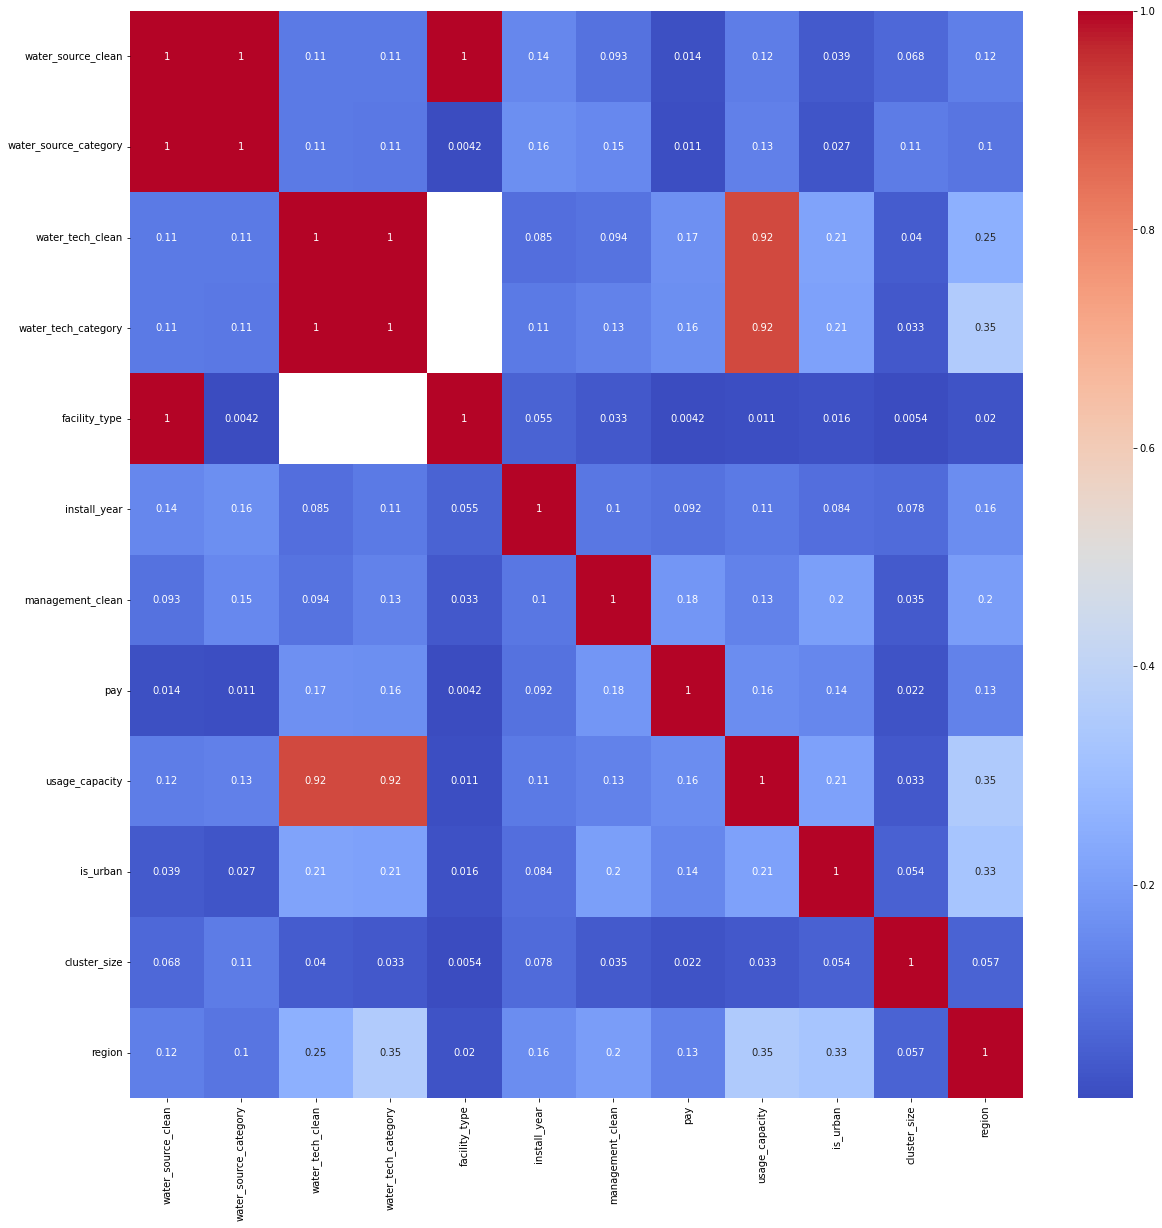

In [38]:
plt.figure(figsize = (20,20))
sns.heatmap(chisq.crimer_v_mat,annot = True,cmap='coolwarm')

Some pairs of categorical variables have strong degree of association, with Variation Inflation Factor > 0.8. They are: 
- water_tech_clean vs water_tech_category
- water_source_clean vs facility_type
- water_tech_category vs water_tech_clean

Facility Type is dropped as this attribute is highly skewed to a single variable. water_tech_category, management_clean, usage_capacity, cluster_size have been recategorized to address classes with few counts.

### Recategorize Variables with skewed distributions of class <a id = 'recode'/>

Improved    29157
Unknown         9
Name: facility_type, dtype: int64


Text(0.5, 1.0, 'facility type distribution')

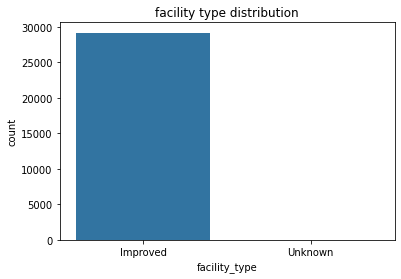

In [39]:
print(data['facility_type'].value_counts())
sns.countplot(x = 'facility_type', data = data)
plt.title('facility type distribution')

Text(0.5, 1.0, 'water_tech_category distribution')

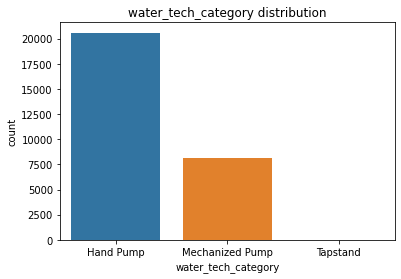

In [40]:
data['water_tech_category'].value_counts()
sns.countplot(x = 'water_tech_category', data = data)
plt.title('water_tech_category distribution')

Text(0.5, 1.0, 'water_tech_category distribution')

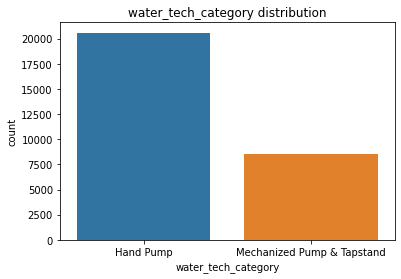

In [41]:
data['water_tech_category'] = data['water_tech_category'].apply(lambda x: x if x == 'Hand Pump' else 'Mechanized Pump & Tapstand')
data['water_tech_category'].value_counts()
sns.countplot(x = 'water_tech_category', data = data)
plt.title('water_tech_category distribution')

Text(0.5, 1.0, 'management_clean distribution')

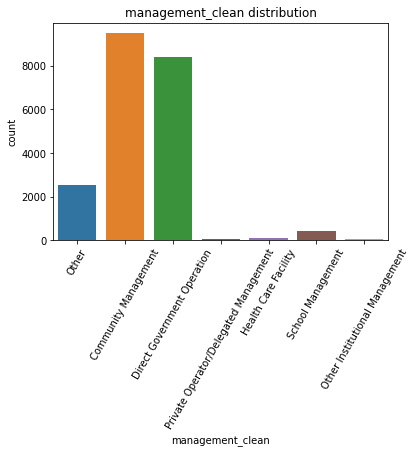

In [42]:
data['management_clean'].value_counts()
sns.countplot(x = 'management_clean', data = data)
plt.xticks(rotation=60)
plt.title('management_clean distribution')

Text(0.5, 1.0, 'management_clean distribution')

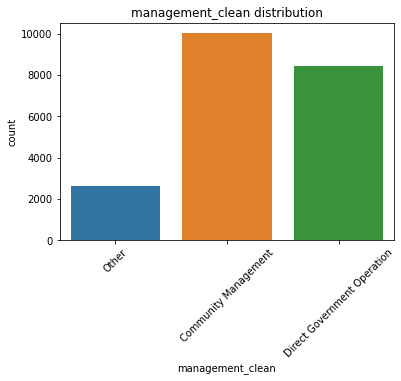

In [43]:
def management_recode(x):
    if x == 'School Management' or x == 'Health Care Facility':
        return 'Community Management'
    elif x == 'Private Operator/Delegated Management' or x == 'Other Institutional Management':
        return 'Other'
    else:
        return x
data['management_clean'] = data['management_clean'].apply(lambda x: management_recode(x))
data['management_clean'].value_counts()
sns.countplot(x = 'management_clean', data = data)
plt.xticks(rotation=45)
plt.title('management_clean distribution')

Text(0.5, 1.0, 'usage_capacity distribution')

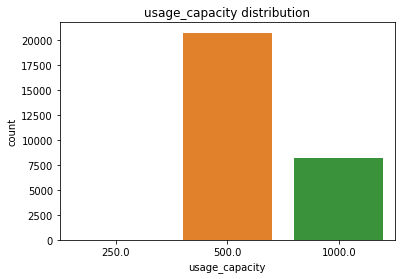

In [44]:
data['usage_capacity'].value_counts()
sns.countplot(x = 'usage_capacity', data = data)
plt.title('usage_capacity distribution')

Text(0.5, 1.0, 'usage_capacity distribution')

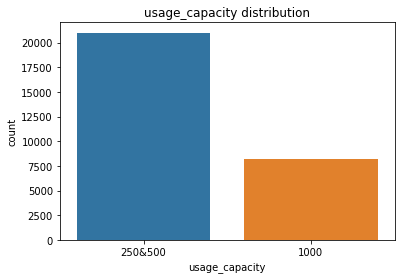

In [45]:
data['usage_capacity'] = data['usage_capacity'].apply(lambda x: "1000" if x == 1000 else "250&500")
data['usage_capacity'].value_counts()
sns.countplot(x = 'usage_capacity', data = data)
plt.title('usage_capacity distribution')

Text(0.5, 1.0, 'is_urban distribution')

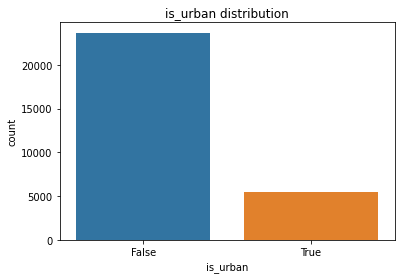

In [46]:
data['is_urban'].value_counts()
sns.countplot(x = 'is_urban', data = data)
plt.title('is_urban distribution')

Text(0.5, 1.0, 'cluster_size distribution')

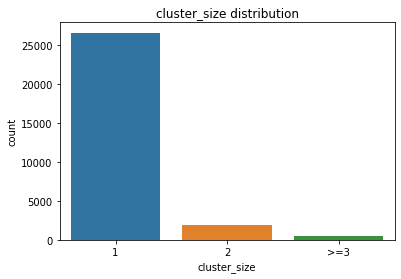

In [47]:
data['cluster_size'].value_counts()
data['cluster_size'] = data['cluster_size'].apply(lambda x: str(x) if x <= 2 else ">=3")
sns.countplot(x = 'cluster_size', data = data)
plt.title('cluster_size distribution')

In [48]:
cat_var

['water_source_clean',
 'water_source_category',
 'water_tech_clean',
 'water_tech_category',
 'facility_type',
 'install_year',
 'management_clean',
 'pay',
 'usage_capacity',
 'is_urban',
 'cluster_size',
 'region']

In [58]:
cat_var.r

['water_source_clean',
 'water_source_category',
 'water_tech_clean',
 'water_tech_category',
 'facility_type',
 'management_clean',
 'pay',
 'usage_capacity',
 'is_urban',
 'cluster_size',
 'region']

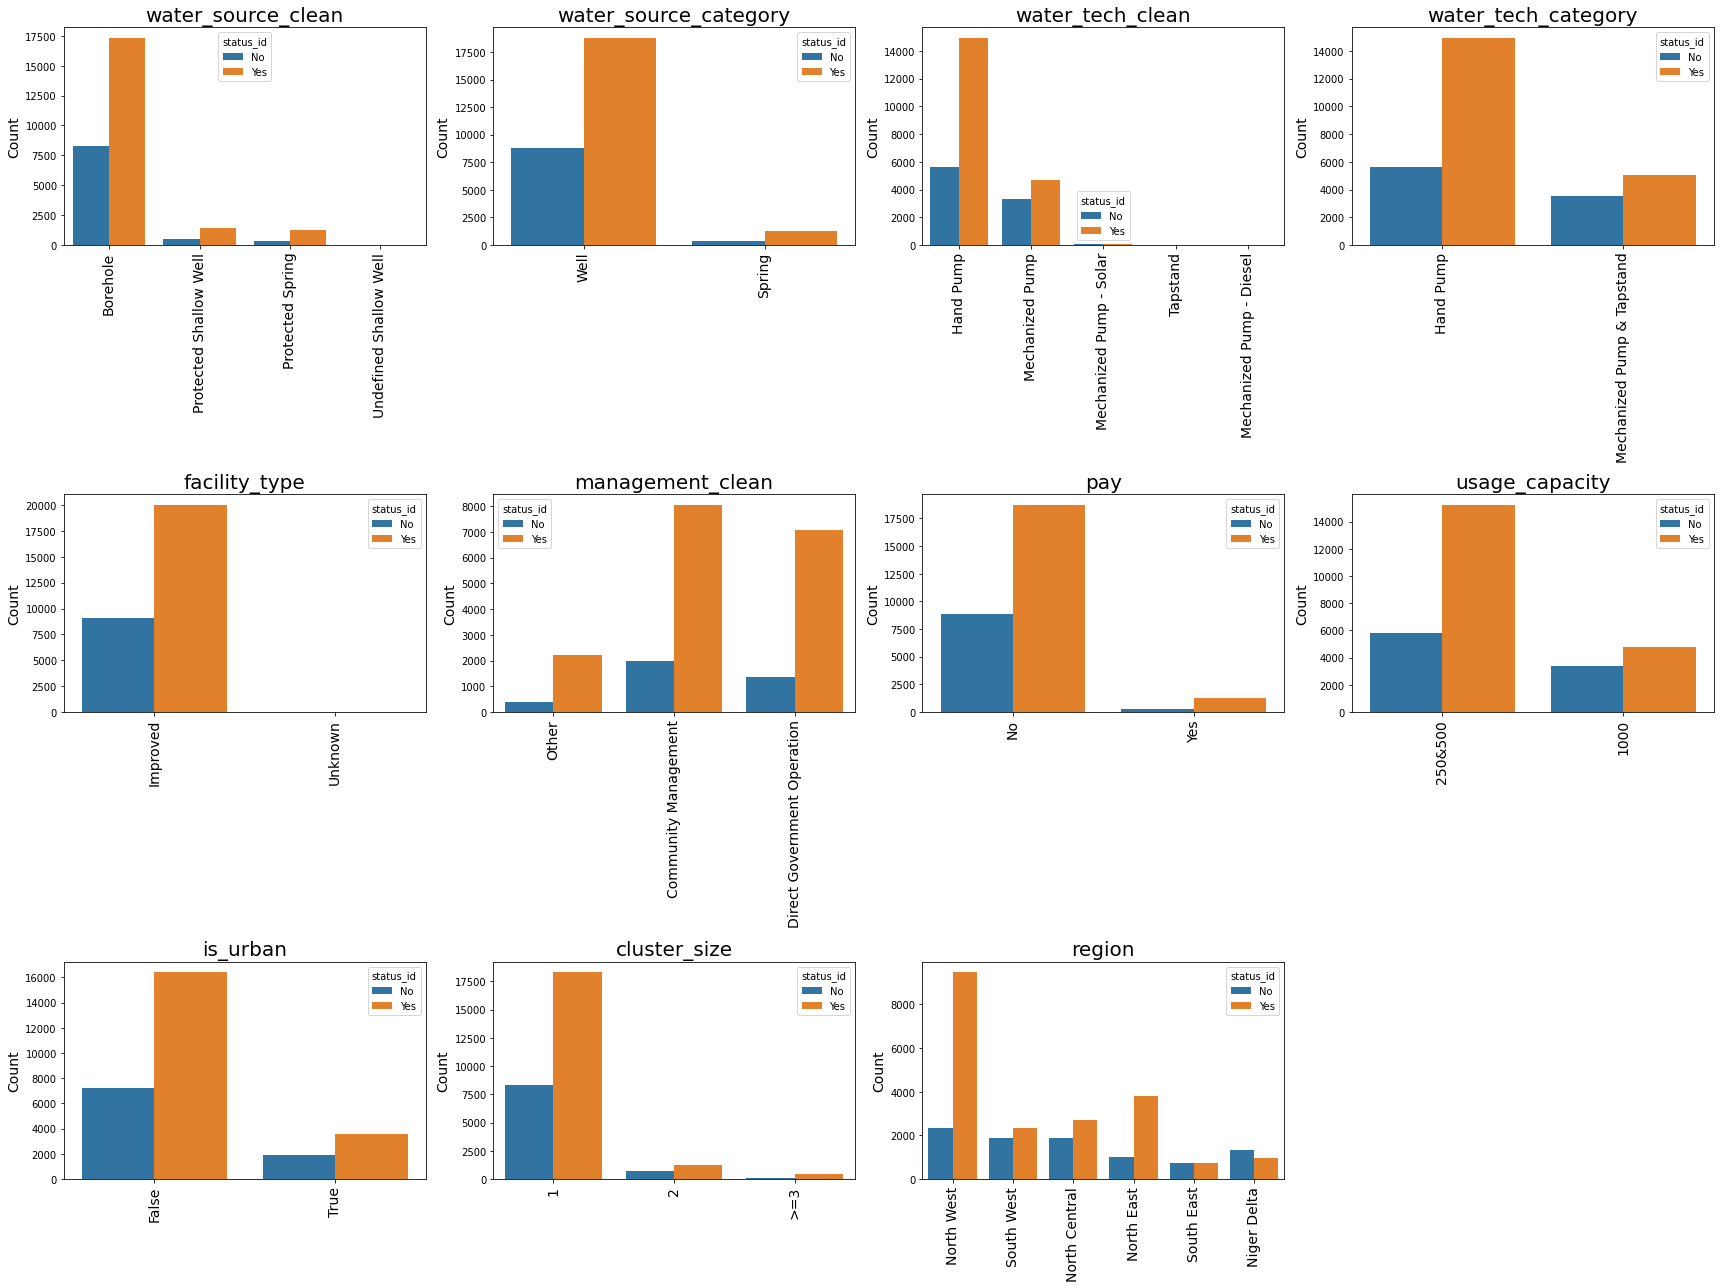

In [65]:
plt.figure(figsize = (24,18))
ind = 0
while ind <= 10:
    plt.subplot(3,4,ind+1)
    sns.countplot(x= cat_var[ind],  hue="status_id", data=data)
    plt.xticks(rotation = 90, fontsize = 14)
    plt.xlabel(None)
    plt.ylabel("Count", fontsize = 14)
    plt.title(cat_var[ind], fontsize = 20)
    plt.tight_layout()
    ind += 1

In [66]:
data.drop(columns = 'water_source_clean', inplace = True)
data.drop(columns = 'water_tech_clean', inplace = True)
data.drop(columns = 'facility_type', inplace = True)
data.drop(columns = 'install_year', inplace = True)

In [67]:
data.isna().sum()

lat_deg                          0
lon_deg                          0
status_id                        0
water_source_category            0
water_tech_category              0
management_clean              8095
pay                              0
subjective_quality               0
distance_to_primary_road         0
distance_to_secondary_road       0
distance_to_tertiary_road        0
distance_to_city                 0
distance_to_town                 0
served_population              205
local_population_1km           205
crucialness                   1905
usage_capacity                   0
is_urban                         0
cluster_size                     0
region                           0
dtype: int64

### Missing Data Imputation <a id = 'missing'/>

For variable missing data, there are multiple ways to perform imputation of the data. The common ways if the portion of missing data is small compared to the dataset is to simply drop the rows with missing data. Other simple methods include mean/median imputation (set the values of all missing data to the mean/median of the remaining present data). For categorical variables, we can set the values of missing data to the most frequently occured class of this variable. These methods are simple and fast, but might not captured the data distribution and can be susceptible to outliers for the case of mean imputation.<br>

Other more sophiscated methods include imputation using K-Nearest_Neighbor (KNN) or RandomForest Imputation (<a href=https://towardsdatascience.com/how-to-use-python-and-missforest-algorithm-to-impute-missing-data-ed45eb47cb9a>Reference</a>).<br>

We will use mean imputation for the continuous variables in the dataset as the number of missing values is relatively small.

In [68]:
data['management_clean'].fillna('Missing',inplace = True)

In [69]:
missing_attributes = ['served_population','local_population_1km','crucialness']
for i in missing_attributes:
    mean = data[i].mean()
    data[i].fillna(mean,inplace = True)
print(data.isna().sum())

lat_deg                       0
lon_deg                       0
status_id                     0
water_source_category         0
water_tech_category           0
management_clean              0
pay                           0
subjective_quality            0
distance_to_primary_road      0
distance_to_secondary_road    0
distance_to_tertiary_road     0
distance_to_city              0
distance_to_town              0
served_population             0
local_population_1km          0
crucialness                   0
usage_capacity                0
is_urban                      0
cluster_size                  0
region                        0
dtype: int64


Next, all categorical variables are converted into One-Hot encoder, dropping 1 class for each attributes to prevent multicolliniear issue. All continuous variables are normalized using StandardScaler.

In [70]:
# Binarize Data
cat_var1 = ['water_source_category', 'water_tech_category','management_clean', 
            'pay','usage_capacity', 'is_urban','cluster_size', 'region']
conti_var1 = ['lat_deg', 'lon_deg','distance_to_primary_road',
             'distance_to_secondary_road', 'distance_to_tertiary_road',
             'distance_to_city', 'distance_to_town','served_population',
             'local_population_1km', 'crucialness']
dummies = pd.get_dummies(data[cat_var1],drop_first = True)

In [71]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
conti_data = scl.fit_transform(data[conti_var1])

In [72]:
## Data for fitting model
x = np.concatenate((dummies.values,conti_data),axis = 1)
y = data['status_id'].apply(lambda x: 1 if x == 'No' else 0).values

In [73]:
column_labels = list(dummies.columns) + conti_var1
column_labels

['is_urban',
 'water_source_category_Well',
 'water_tech_category_Mechanized Pump & Tapstand',
 'management_clean_Direct Government Operation',
 'management_clean_Missing',
 'management_clean_Other',
 'pay_Yes',
 'usage_capacity_250&500',
 'cluster_size_2',
 'cluster_size_>=3',
 'region_North Central',
 'region_North East',
 'region_North West',
 'region_South East',
 'region_South West',
 'lat_deg',
 'lon_deg',
 'distance_to_primary_road',
 'distance_to_secondary_road',
 'distance_to_tertiary_road',
 'distance_to_city',
 'distance_to_town',
 'served_population',
 'local_population_1km',
 'crucialness']


<br><br><br><br>
# Model Building and Evaluation

To build a model to predict the water point functionality, the dataset was partitioned into training dataset (60%) and test dataset (40%).

In [74]:
## Split data into train & test datasets
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size = 0.4,
                                                                    random_state = 2021)

## Logistic Regression Model <a id = 'lr'/>
Logistic Regression model attempts to fit the logit function $ log(\large\frac{1}{1-p})$ or logit(p) against multiple and maximizes the probability of getting the observed results based on the fitted coefficients. predictors based on the following equation: <br><br>
<center>$\large logit(p)=\beta_0+\beta_1 X_1+ \beta_2 X_2+ \beta_3 X_3+⋯+\beta_n X_n$<center/> <br><br>

### Base Model (L2 Norm, C = 1)

In [75]:
lr_base = linear_model.LogisticRegression(random_state = 2021,
                                          solver = 'lbfgs')
lr_base.fit(x_train, y_train)
y_pred = lr_base.predict(x_test)

In [101]:
lr_best_coef = pd.DataFrame(lr_base.coef_[0], index = column_labels, columns = ['Coefficient'])
lr_best_coef['magnitude'] = abs(lr_best_coef)
lr_best_coef = lr_best_coef.sort_values(by = 'Coefficient', ascending = False)
lr_best_coef_for_plot = pd.concat((lr_best_coef[:7],lr_best_coef[len(lr_best_coef)-7:]))
lr_best_coef_for_plot = lr_best_coef_for_plot.sort_values(by = "Coefficient")

Text(0.5, 1.0, 'Feature Importance (LR weights)')

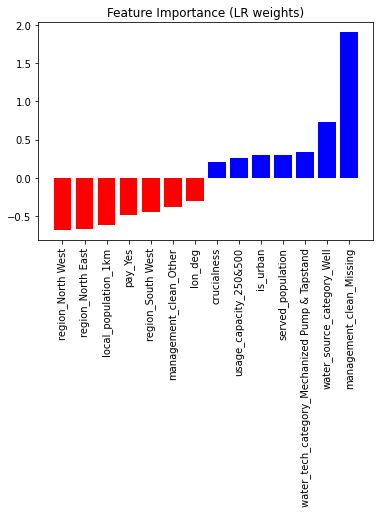

In [103]:
color = ["red","blue"]
colormap = [color[value > 0] for value in lr_best_coef_for_plot["Coefficient"]]
plt.figure()
plt.bar(lr_best_coef_for_plot.index, lr_best_coef_for_plot["Coefficient"], color = colormap)
plt.xticks(rotation = 90)
plt.title("Feature Importance (LR weights)")

Variables with highest weights for Base Logistic Regression model is management_clean Missing?, Water_Source_Category, Region. Water Points without a management body to govern, Water Points which are Wells tend to have higher tendency to be Non-Functional. On the other hand, water points which are in North areas tend to be more functional than other areas.

In [77]:
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test,y_pred))
print('\nAccuracy Score: {:.4f}'.format(metrics.accuracy_score(y_test,y_pred)))
print('\nPrecision Score: {:.4f}'.format(metrics.precision_score(y_test,y_pred)))
print('\nRecall Score: {:.4f}'.format(metrics.recall_score(y_test,y_pred)))
print('\nF1 Score: {:.4f}'.format(metrics.f1_score(y_test,y_pred)))
print('\nAUC Score: {:.4f}'.format(metrics.roc_auc_score(y_test,y_pred)))

Confusion Matrix:
 [[7249  773]
 [1601 2044]]

Accuracy Score: 0.7965

Precision Score: 0.7256

Recall Score: 0.5608

F1 Score: 0.6326

AUC Score: 0.7322


### Best Model (L2 Norm)

Here we use GridSearchCV to find the optimum regularization factor which give the best performance. The performance parameter to evaluate GridSearch performance is 'ROC_AUC_score'.

In [78]:
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'GridSearch CV AUC Score vs C')

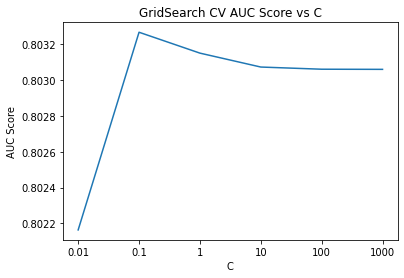

In [105]:
from sklearn.model_selection import GridSearchCV
params_grid = {'C':[0.01,0.1, 1, 10, 100,1000]}
lr_l2 = linear_model.LogisticRegression(penalty = 'l2',
                          random_state = 2021,
                          solver = 'lbfgs')

lr_models = GridSearchCV(lr_l2,params_grid,
                         scoring = 'roc_auc')

lr_models.fit(x_train,y_train)
auc_scores = lr_models.cv_results_['mean_test_score']
plt.plot([str(i) for i in params_grid['C']],auc_scores)
plt.xlabel('C')
plt.ylabel('AUC Score')
plt.title('GridSearch CV AUC Score vs C')

The regularization factor which gives the highest AUC score is 0.1. The Logistic Regression performance of the best model (C = 0.1) is as follow

In [106]:
best_lr_l2 = lr_models.best_estimator_.fit(x_train,y_train)
y_pred_lr_l2 = best_lr_l2.predict(x_test)
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test,y_pred_lr_l2))
print('\nAccuracy Score: {:.4f}'.format(metrics.accuracy_score(y_test,y_pred_lr_l2)))
print('\nPrecision Score: {:.4f}'.format(metrics.precision_score(y_test,y_pred_lr_l2)))
print('\nRecall Score: {:.4f}'.format(metrics.recall_score(y_test,y_pred_lr_l2)))
print('\nF1 Score: {:.4f}'.format(metrics.f1_score(y_test,y_pred_lr_l2)))
print('\nAUC Score: {:.4f}'.format(metrics.roc_auc_score(y_test,y_pred_lr_l2)))

Confusion Matrix:
 [[7259  763]
 [1604 2041]]

Accuracy Score: 0.7971

Precision Score: 0.7279

Recall Score: 0.5599

F1 Score: 0.6330

AUC Score: 0.7324


### Best Model (L1 Norm)

Here we use GridSearchCV to find the optimum regularization factor which give the best performance. The performance parameter to evaluate GridSearch performance is 'ROC_AUC_score'.


Text(0.5, 1.0, 'AUC Score vs C for L1 Norm')

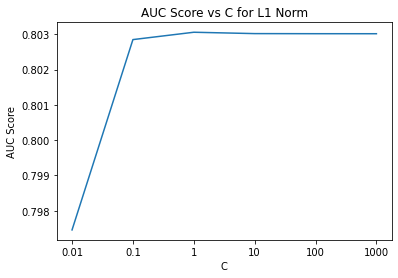

In [104]:
lr_l1 = linear_model.LogisticRegression(penalty = 'l1',
                                        random_state = 2021,
                                        solver = 'saga',
                                       max_iter = 250)

lr_models_l1 = GridSearchCV(lr_l1,params_grid,
                         scoring = 'roc_auc',
                        # n_jobs = 4
                         )

lr_models_l1.fit(x_train,y_train)
auc_scores = lr_models_l1.cv_results_['mean_test_score']
plt.plot([str(i) for i in params_grid['C']],auc_scores)
plt.xlabel('C')
plt.ylabel('AUC Score')
plt.title('AUC Score vs C for L1 Norm')

The performance of Logistic Regression using L1 norm is quite different from L2 norm. Best AUC Score achieve is when C = 1. The corresponding AUC on the test data using the best model is 0.7327.

In [107]:
best_lr_l1 = lr_models_l1.best_estimator_.fit(x_train,y_train)
y_pred_lr_l1 = best_lr_l1.predict(x_test)
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test,y_pred_lr_l1))
print('\nAccuracy Score: {:.4f}'.format(metrics.accuracy_score(y_test,y_pred_lr_l1)))
print('\nPrecision Score: {:.4f}'.format(metrics.precision_score(y_test,y_pred_lr_l1)))
print('\nRecall Score: {:.4f}'.format(metrics.recall_score(y_test,y_pred_lr_l1)))
print('\nF1 Score: {:.4f}'.format(metrics.f1_score(y_test,y_pred_lr_l1)))
print('\nAUC Score: {:.4f}'.format(metrics.roc_auc_score(y_test,y_pred_lr_l1)))

Confusion Matrix:
 [[7248  774]
 [1597 2048]]

Accuracy Score: 0.7968

Precision Score: 0.7257

Recall Score: 0.5619

F1 Score: 0.6334

AUC Score: 0.7327


In [110]:
params_grid_elastic = {'C':[0.01, 0.1, 1, 10, 100,1000],'l1_ratio':[0.25, 0.5, 0.75]}
lr_elastic = linear_model.LogisticRegression(penalty = 'elasticnet',
                                        random_state = 2021,
                                        solver = 'saga',
                                       max_iter = 250)

lr_models_elastic = GridSearchCV(lr_elastic,params_grid_elastic,
                         scoring = 'roc_auc', 
                         #n_jobs = 4
                          )

lr_models_elastic.fit(x_train,y_train)
auc_scores = lr_models_elastic.cv_results_['mean_test_score'].reshape(3,-1)

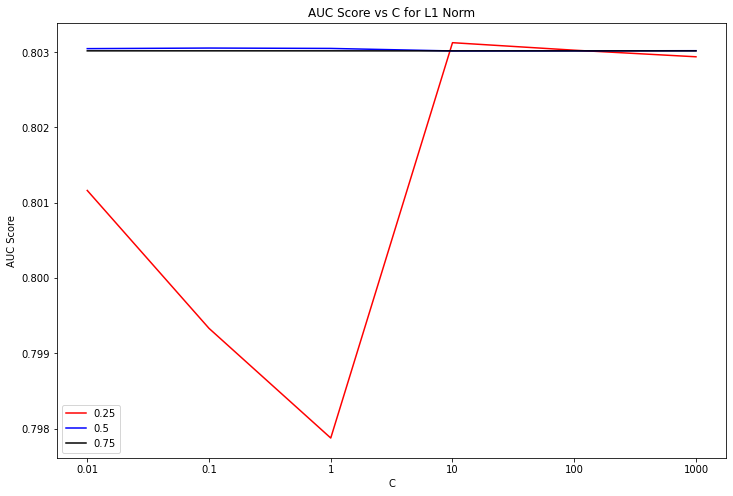

In [111]:
color = ['red','blue','black']
plt.figure(figsize = (12,8))
for i in range(len(params_grid_elastic['l1_ratio'])):
    plt.plot([str(j) for j in params_grid['C']],auc_scores[i],color = color[i],label = str(params_grid_elastic['l1_ratio'][i]))
plt.xlabel('C')
plt.ylabel('AUC Score')
plt.title('AUC Score vs C for L1 Norm')
plt.legend()

The best AUC score for elastic net model is when C = 0.1 & l1_ratio = 0.5. The performance of the best model on the test dataset is summarized as below.

In [112]:
best_lr_elastic = lr_models_elastic.best_estimator_.fit(x_train,y_train)
y_pred_lr_elastic = lr_models_elastic.predict(x_test)
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test,y_pred_lr_elastic))
print('\nAccuracy Score: {:.4f}'.format(metrics.accuracy_score(y_test,y_pred_lr_elastic)))
print('Precision Score: {:.4f}'.format(metrics.precision_score(y_test,y_pred_lr_elastic)))
print('Recall Score: {:.4f}'.format(metrics.recall_score(y_test,y_pred_lr_elastic)))
print('F1 Score: {:.4f}'.format(metrics.f1_score(y_test,y_pred_lr_elastic)))
print('AUC Score: {:.4f}'.format(metrics.roc_auc_score(y_test,y_pred_lr_elastic)))

Confusion Matrix:
 [[7258  764]
 [1599 2046]]

Accuracy Score: 0.7975
Precision Score: 0.7281
Recall Score: 0.5613
F1 Score: 0.6339
AUC Score: 0.7330


## Naive Bayes Classifier Model <a id = 'nb'/>

Naive Bayes Classifiers are a family of simple classifiers which models the posterior A probability of the classes given the dataset. It is a probabilistic model using Bayes Theorem to calculate the posterior probability based on the class prior and the likelihood of observing the data provided the class of interest. The formula is as follow:
<br><br>
<center>$ Posterior Probability = \large \frac{Prior Probability\  x \ Likelihood}{Evidence} $ </center> <br>
<center>$ P(C_k|x) = \large \frac{p(C_k)p(x|C_k)}{P(x)}$</center> <br>

where $P(C_k)$ represents the prior probability of class k, $P(x|C_k)$ represents the likelihood to observe a particular set of input x under class k, which can be estimated by the probablity distribution based on the dataset. Naive Bayes classifiers are fast and simple. However, the classifiers under Naive Bayes operate under the assumption that all features are independent of each other, which is not realistic in most scenarios.

In this problem, we will use CategoricalNB to handle categorical variables, which are assumed to follow Multinomial distribution. For continuous variables, GaussianNB will be used assuming that continuous variables follow Normal Distribution.

#### GaussianNB for Continuous Variables

In [113]:
from sklearn import naive_bayes as nb

x_cont = conti_data
x_cont_train, x_cont_test, y_train, y_test = model_selection.train_test_split(x_cont,y,test_size = 0.4,
                                                                    random_state = 2021)


## Model Fitting

# Continuous
gnb = nb.GaussianNB()
gnb.fit(x_cont_train, y_train)
cont_pred_log_prob = gnb.predict_log_proba(x_cont_test)
cont_train_log_prob = gnb.predict_log_proba(x_cont_train)

#### CategoricalNB for Categorical Variables

In [114]:
x_cat_train, x_cat_test, y_train, y_test = model_selection.train_test_split(dummies.values,y,test_size = 0.4,
                                                                    random_state = 2021)

# Categorical
cnb = nb.CategoricalNB(alpha = 1)
cnb.fit(x_cat_train,y_train)
cat_pred_log_prob = cnb.predict_log_proba(x_cat_test)
cat_train_log_prob = cnb.predict_log_proba(x_cat_train)

#### Combining CategoricalNB & GaussianNB for classification

In [115]:
# Combine
pred_prob = cat_pred_log_prob + cont_pred_log_prob
train_prob = cat_train_log_prob + cont_train_log_prob
y_pred = 1*(pred_prob[:,1] >= pred_prob[:,0])
y_train_nb = 1*(train_prob[:,1] >= train_prob[:,0])

In [116]:
# Testing Data
print('Testing Set results:')
print(metrics.confusion_matrix(y_test,y_pred),'\n')
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))
print('Precision Score:',metrics.precision_score(y_test,y_pred))
print('Recall Score:',metrics.recall_score(y_test,y_pred))
print('F1 Score',metrics.f1_score(y_test,y_pred))
print('AUC Score',metrics.roc_auc_score(y_test,y_pred))

Testing Set results:
[[6533 1489]
 [1510 2135]] 

Accuracy Score: 0.7429502014228165
Precision Score: 0.5891280353200883
Recall Score: 0.5857338820301783
F1 Score 0.587426055853625
AUC Score 0.7000596610350344


## Tree-Based Classifier Models <a id = 'dtree'/>

Decision Tree Classification is a method which involves "recursively partitioning the input space and defining a local model in each resulting region of input space. This can be represented by a tree, with one leaf per region" (Kevin P.Murphy: Machine Learning, A probabilistic Perspective). The idea is to split the tree so that the childrens of the binary trees provide some additional information to help classifying the input data into different classes. By running down a trained tree from the root to a certain leave node, we can classify the sample output based on the route that it has taken and the final leaf node which it arrives at the end of the traversal.

A decision tree is built using the training dataset. The choices of features chosen at each step are based on the amount of information gained that the features split will give, which are the differences in purity/impurity before and after the split. We pick the feature split that maximizes the information gain. There are two common ways to quantify the amount of impurity at certain nodes: Gini Impurity and Entropy.

- $ Entropy = \large -\sum_i^n(p_ilog(p_i)) $ <br><br> 
- $ Gini\_Impurity = 1 - \sum_i \large \frac{|S_i|}{|S|} $ <br>

In this exercise, we will build a different tree models using Gini_Impurity.

#### Base Decision Tree <a id = 'dtree'/>

In [50]:
#### Decision Tree Model
## Fit Model (Full Tree)
tree_clf = tree.DecisionTreeClassifier(criterion = 'gini',random_state = 2021)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [53]:
y_pred = tree_clf.predict(x_test)
print('Testing Set results:')
print(metrics.confusion_matrix(y_test,y_pred),'\n')
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))
print('Precision Score:',metrics.precision_score(y_test,y_pred))
print('Recall Score:',metrics.recall_score(y_test,y_pred))
print('F1 Score',metrics.f1_score(y_test,y_pred))
print('AUC Score',metrics.roc_auc_score(y_test,y_pred))

Testing Set results:
[[6611 1411]
 [1295 2350]] 

Accuracy Score: 0.7680637696065826
Precision Score: 0.6248338207923425
Recall Score: 0.644718792866941
F1 Score 0.6346205779098029
AUC Score 0.7344137469694964


Next, we will perform some hyper-parameters tuning on the decision_trees models to reduce overfitting and improve accuracy on the test dataset. We use scikit-learn GridSearch CV to input a grid of potential values for hyperparameter optimization. Average AUC score is calculated based on 5-fold cross-validation of the training dataset.

In [55]:
####### Grid-Search CV (Pre-Pruning) #######
## Grid-Search CV (Pre-Pruning) ##
params_grid = {'max_depth':list(range(5,31,5)),
          'min_samples_split':list(range(10,101,10)),
          'min_samples_leaf':list(range(10,101,10))}

gcv = model_selection.GridSearchCV(tree_clf, params_grid,
                                   scoring = 'roc_auc',
                                   n_jobs = 4)
gcv.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=2021), n_jobs=4,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [10, 20, 30, 40, 50, 60, 70, 80,
                                              90, 100],
                         'min_samples_split': [10, 20, 30, 40, 50, 60, 70, 80,
                                               90, 100]},
             scoring='roc_auc')

In [60]:
print('Best hyperparameters for tree-based methods: ',gcv.best_params_)
print('Best AUC score:', gcv.best_score_)

Best hyperparameters for tree-based methods:  {'max_depth': 15, 'min_samples_leaf': 30, 'min_samples_split': 90}
Best AUC score: 0.8234671823171438


In [63]:
## Refit entire training data based on best hyperparameters settings:
tree_clf = tree.DecisionTreeClassifier(criterion = 'gini', 
                                       max_depth = 15, min_samples_leaf = 30, min_samples_split = 90,
                                       random_state = 2021)
tree_clf.fit(x_train, y_train)
y_pred = tree_clf.predict(x_test)
print('Testing Set results:')
print(metrics.confusion_matrix(y_test,y_pred),'\n')
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))
print('Precision Score:',metrics.precision_score(y_test,y_pred))
print('Recall Score:',metrics.recall_score(y_test,y_pred))
print('F1 Score',metrics.f1_score(y_test,y_pred))
print('AUC Score',metrics.roc_auc_score(y_test,y_pred))

Testing Set results:
[[7061  961]
 [1389 2256]] 

Accuracy Score: 0.7985771835090426
Precision Score: 0.701274479328567
Recall Score: 0.6189300411522634
F1 Score 0.6575342465753424
AUC Score 0.749567239474162


Both Accuracy Score and AUC Score has improved compared to the base tree model without optimal hyperparameters.
Next we try another method using Cost Complexity Penalty (Post-Pruning). Cost Complexity Pruning assigns a regularization factor which penalizes the tree for having additional nodes. This method is analogous to regularization in linear models such as linear regression and logistic regression. The general formula for the cost/misclassification rate governed by the cost complexity method is as follow: <br><br>
<center> $ \large R_\alpha(T) = R(T) + \alpha x T $ </center> <br>
where T is the number of terminal nodes of the tree, $\alpha$ is the penalty per terminal nodes, R(T) is the objective cost function which we want to minimize.

Scikit-learn Tree Classifier traces the ccp_alpha values for each node by the tree.cost_complexity_pruning_path method when splitting occurs. For each alpha values, we will build a tree using a training dataset and validate the performance of the tree against a validation dataset. The alpha values which gives the highest score will be then used to fit against the entire the training data to form the optimum tree.

In [88]:
## Post Pruning (Cost Complexity Penalty)
## Fit Model (Full Tree)
tree_clf = tree.DecisionTreeClassifier(criterion = 'gini',
                                        random_state = 2021)


tree_clf.fit(x_train, y_train)
# plt.figure(figsize = (40,40))
# tree.plot_tree(tree_clf,filled = True)
tree_obj = tree_clf.tree_

y_pred = tree_clf.predict(x_test)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

## Post Pruning (Using test_data)
path = tree_clf.cost_complexity_pruning_path(x_train, y_train)
alphas = path['ccp_alphas'][600:]

accuracy_train, accuracy_test = [], []
precision_train, precision_test = [], []
recall_train, recall_test = [], []
auc_train, auc_test = [], []
for alpha in alphas:
    tree_ccp = tree.DecisionTreeClassifier(criterion = 'gini',
                                           random_state = 2021,
                                           ccp_alpha=alpha)
    tree_ccp.fit(x_train,y_train)
    y_train_pred = tree_ccp.predict(x_train)
    y_pred = tree_ccp.predict(x_test)
    
    accuracy_train.append(metrics.accuracy_score(y_train,y_train_pred))
    recall_train.append(metrics.recall_score(y_train,y_train_pred))
    auc_train.append(metrics.roc_auc_score(y_train,y_train_pred))
    
    accuracy_test.append(metrics.accuracy_score(y_test,y_pred))
    recall_test.append(metrics.recall_score(y_test,y_pred))
    auc_test.append(metrics.roc_auc_score(y_test,y_pred))

[[6611 1411]
 [1295 2350]]
0.7680637696065826
0.6248338207923425
0.644718792866941


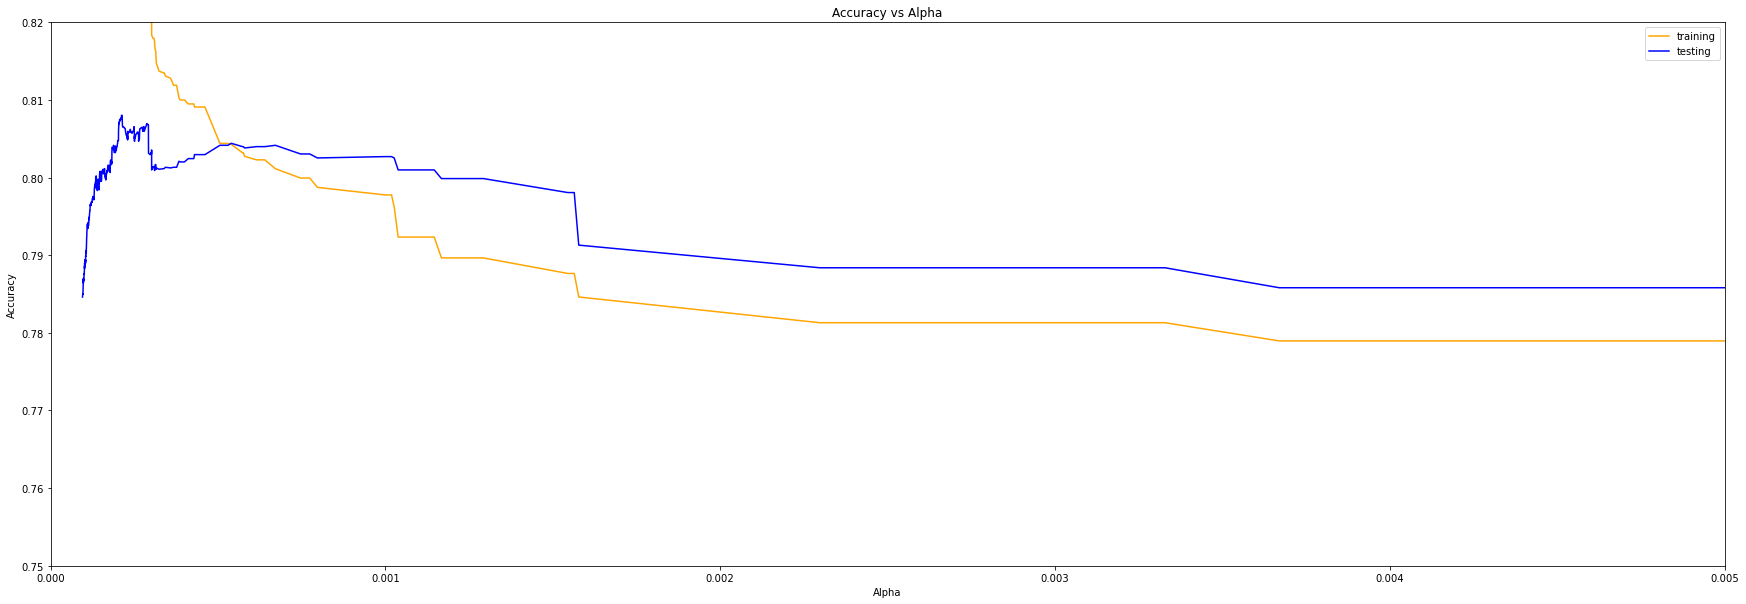

In [89]:
plt.figure(figsize = (30,10))
plt.plot(alphas,accuracy_train,c = 'orange',label = 'training')
plt.plot(alphas,accuracy_test, c = 'blue', label = 'testing')
plt.ylim(0.75,0.82)
plt.xlim(0,0.005)
plt.title('Accuracy vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()

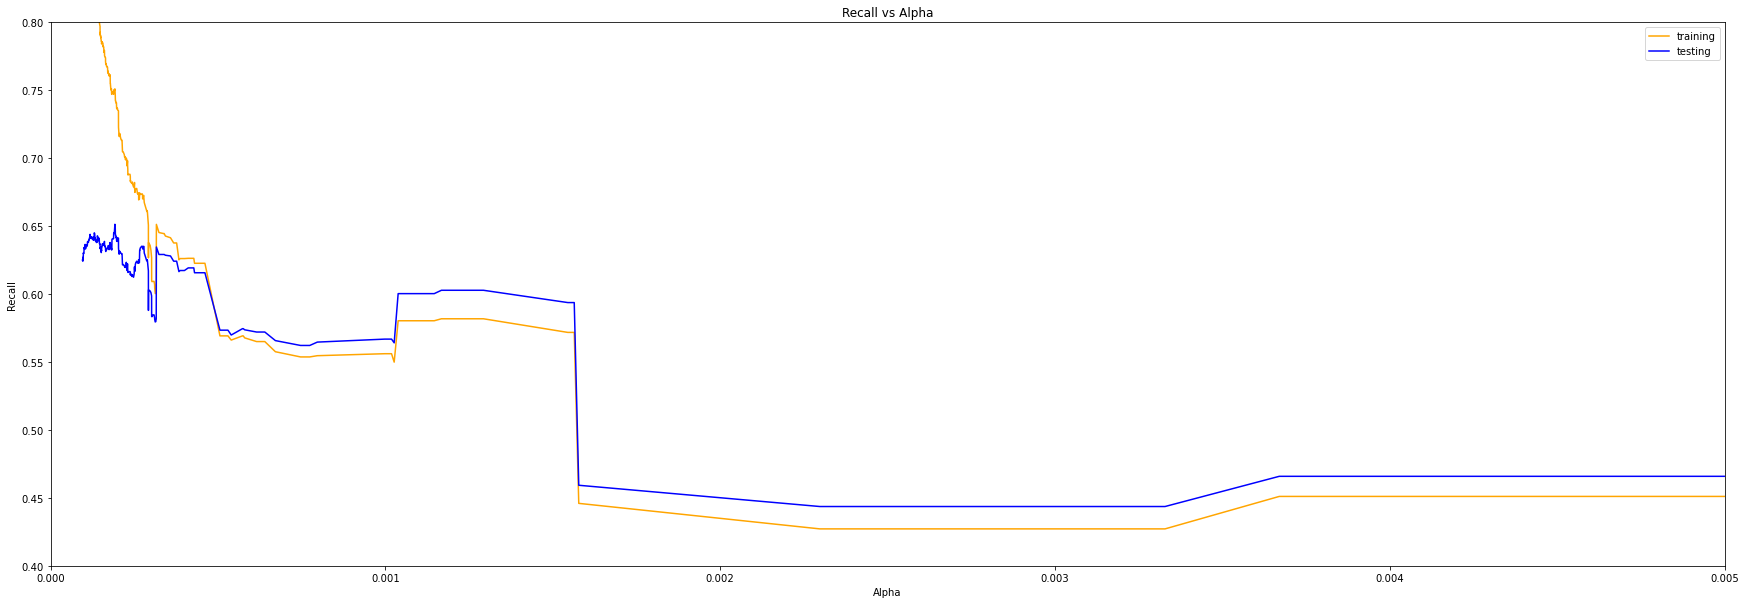

In [90]:
plt.figure(figsize = (30,10))
plt.plot(alphas,recall_train,c = 'orange',label = 'training')
plt.plot(alphas,recall_test, c = 'blue', label = 'testing')
plt.title('Recall vs Alpha')
plt.ylim(0.4,0.8)
plt.xlim(0,0.005)
plt.xlabel('Alpha')
plt.ylabel('Recall')
plt.legend()

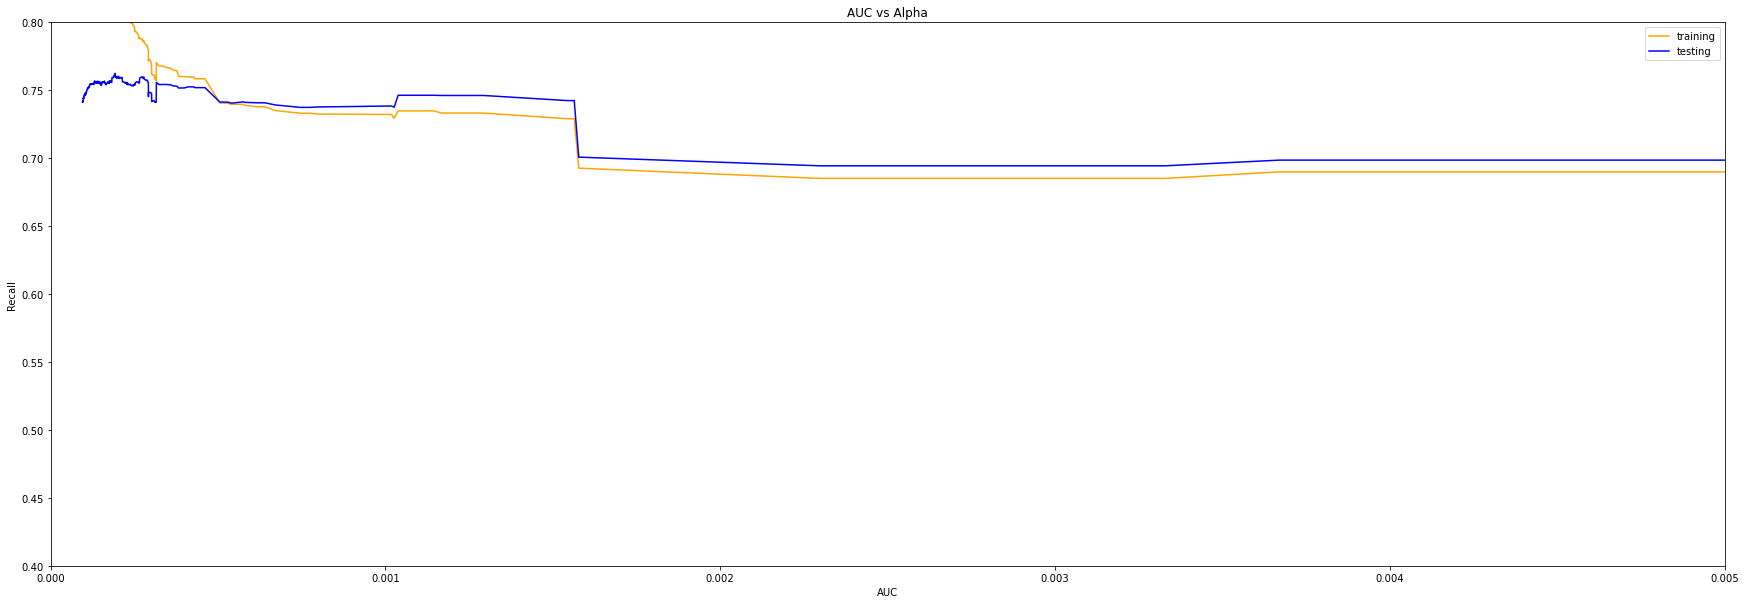

In [91]:
plt.figure(figsize = (30,10))
plt.plot(alphas,auc_train,c = 'orange',label = 'training')
plt.plot(alphas,auc_test, c = 'blue', label = 'testing')
plt.title('AUC vs Alpha')
plt.ylim(0.4,0.8)
plt.xlim(0,0.005)
plt.xlabel('AUC')
plt.ylabel('Recall')
plt.legend()

In [99]:
print('Best alpha = ', alphas[np.argmax(auc_test)])

Best alpha =  0.00019208272981952761


Based on the chart, the highest accuracy/recall/roc_auc score happens when alpha = 
We will use alpha = to fit a new tree using the entire training data.
It can be observed that the accuracy score and AUC score are both higher compared to the optimum tree optimized using pre-pruning method.

In [100]:
pruned_tree = tree.DecisionTreeClassifier(random_state = 2021,
                                         ccp_alpha = alphas[np.argmax(auc_test)])
pruned_tree.fit(x_train, y_train)

y_pred = pruned_tree.predict(x_test)
print('Testing Set results:')
print(metrics.confusion_matrix(y_test,y_pred),'\n')
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))
print('Precision Score:',metrics.precision_score(y_test,y_pred))
print('Recall Score:',metrics.recall_score(y_test,y_pred))
print('F1 Score',metrics.f1_score(y_test,y_pred))
print('AUC Score',metrics.roc_auc_score(y_test,y_pred))

Testing Set results:
[[7006 1016]
 [1271 2374]] 

Accuracy Score: 0.8039770292277364
Precision Score: 0.7002949852507374
Recall Score: 0.6513031550068588
F1 Score 0.674911158493248
AUC Score 0.7623257236016593


## Bagging Classifier Models <a id = 'bag'/> <br>
Ensemble models try to combine many weakers classifiers to reduce variance and bias of the entire classifier. In this exercise, we will explore two main families of ensembles which use homogenuous classifiers (Bagging and Boosting). The base classifier used will be decision trees. 

For bagging, bootstrap datasets are created to fit many weaker trees, all of which are independent to each other. All sub-classiifers have similar weight in the final classification. Final classification uses either voting (class with the most votes) or using the aggregated probability function: <br> <br>

<center> $ \large c^* (x) = argmax_c \sum_{i=1}^k p(c|h_i, x) $ </center> <br>
    
where c is the classification labels, x is the input, $h_i$ is the sub classifier, k = total number of sub classifiers.

In [110]:
bag = ensemble.BaggingClassifier (base_estimator = tree.DecisionTreeClassifier(criterion = 'gini',
                                                                              random_state = 2021),
                                  n_estimators = 100,
                                  max_features = 0.5,
                                  max_samples = 0.5,
                                 random_state = 2021,
                                  oob_score = True,
                                 n_jobs = 4)
bag.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=2021),
                  max_features=0.5, max_samples=0.5, n_estimators=100, n_jobs=4,
                  oob_score=True, random_state=2021)

In [111]:
y_pred = bag.predict(x_test)
print('Testing Set results:')
print(metrics.confusion_matrix(y_test,y_pred),'\n')
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))
print('Precision Score:',metrics.precision_score(y_test,y_pred))
print('Recall Score:',metrics.recall_score(y_test,y_pred))
print('F1 Score',metrics.f1_score(y_test,y_pred))
print('AUC Score',metrics.roc_auc_score(y_test,y_pred))

Testing Set results:
[[7425  597]
 [1481 2164]] 

Accuracy Score: 0.8218908031199108
Precision Score: 0.7837739949293734
Recall Score: 0.5936899862825789
F1 Score 0.6756166094286605
AUC Score 0.7596348211143634


In [113]:
rf = ensemble.RandomForestClassifier (n_estimators = 100,
                                     oob_score = True,
                                     random_state = 2021,
                                     ccp_alpha = alphas[np.argmax(auc_test)],
                                     max_features = 0.5)

rf.fit(x_train, y_train)

RandomForestClassifier(ccp_alpha=0.00019208272981952761, max_features=0.5,
                       oob_score=True, random_state=2021)

In [114]:
y_pred = rf.predict(x_test)
print('Testing Set results:')
print(metrics.confusion_matrix(y_test,y_pred),'\n')
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))
print('Precision Score:',metrics.precision_score(y_test,y_pred))
print('Recall Score:',metrics.recall_score(y_test,y_pred))
print('F1 Score',metrics.f1_score(y_test,y_pred))
print('AUC Score',metrics.roc_auc_score(y_test,y_pred))

Testing Set results:
[[7350  672]
 [1290 2355]] 

Accuracy Score: 0.8318333761892517
Precision Score: 0.777998017839445
Recall Score: 0.6460905349794238
F1 Score 0.7059352517985611
AUC Score 0.7811604507357853


Here we fit 2 models using BaggingClassifier and RandomForestClassifier, both of which fall under the family of bagging ensemble. The main difference between BaggingClassifier and RandomForestClassifier is that in the former, the set of features which we use to fit trees are pre-determined before the split. For RandomForestClassifier, the set of features to choose for each split is repicked from the feature pool prior to EACH split. <br><br>

Both BaggingClassifier and RandomForestClassifier yield good results. RandomForestClassifier performance is better than all previous models, which accuracy score of 83.2% and AUC score of 0.781.

## Boosting Classifier Models <a id = 'boost'/> <br>

Different from bagging classifier family whereas all subclassifiers have the same say (weight) to the final outcome of classification, Boosting Classifier family attempts to put weights to subclassifiers which better performance and lower weights to subclassifiers with lower performance. Another aspect of boosting classifiers is that weights are also put on training samples, with the intuition that we want to put more emphasis (weight) on samples which have previously been misclassified so that subsequent classifiers put more focus on these misclassified samples. <br><br>

We will build 3 models using 2 boosting classifiers: Adaboost & Xgboost. Generally, Adaboost is used for classification problems and GradientBoost (Xgboost) is more suited for regression problems. However, both have the options to do the other type of Machine Learning problems.

In [115]:
import xgboost, lightgbm

In [116]:
ada = ensemble.AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(criterion = 'gini',
                                                                              random_state = 2021),
                                 n_estimators = 100,
                                 algorithm = 'SAMME.R',
                                 random_state = 2021)
ada.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=2021),
                   n_estimators=100, random_state=2021)

In [117]:
y_pred = ada.predict(x_test)
print('Testing Set results:')
print(metrics.confusion_matrix(y_test,y_pred),'\n')
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))
print('Precision Score:',metrics.precision_score(y_test,y_pred))
print('Recall Score:',metrics.recall_score(y_test,y_pred))
print('F1 Score',metrics.f1_score(y_test,y_pred))
print('AUC Score',metrics.roc_auc_score(y_test,y_pred))

Testing Set results:
[[7155  867]
 [1357 2288]] 

Accuracy Score: 0.8093768749464301
Precision Score: 0.7251980982567353
Recall Score: 0.6277091906721536
F1 Score 0.6729411764705882
AUC Score 0.7598157022919481


In [118]:
xgb = xgboost.XGBClassifier(n_estimators = 100,
                           learning_rate = 1.0,
                           n_jobs = 4,
                           random_state = 2021)
xgb.fit(x_train, y_train)

[16:41:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=1.0, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=2021,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [119]:
y_pred = xgb.predict(x_test)
print('Testing Set results:')
print(metrics.confusion_matrix(y_test,y_pred),'\n')
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))
print('Precision Score:',metrics.precision_score(y_test,y_pred))
print('Recall Score:',metrics.recall_score(y_test,y_pred))
print('F1 Score',metrics.f1_score(y_test,y_pred))
print('AUC Score',metrics.roc_auc_score(y_test,y_pred))

Testing Set results:
[[7037  985]
 [1264 2381]] 

Accuracy Score: 0.8072340790263135
Precision Score: 0.7073677956030897
Recall Score: 0.6532235939643347
F1 Score 0.6792183711310797
AUC Score 0.7652181295675575


# Conclusion <br>

In this exercise, we built several Machine Learning models to predict the water point functionality in Nigeria using Naive Bayes classifiers, Logistic Regression Models, Decision Tree Models and Ensemble Models. The result for the models can be summarized in the table below. RandomForest has the highest performance whereas Naive Bayes classifier yields the worst performance based on test dataset. <br> <br>


|      | Naive Bayes | Log Reg (L1) | Log Reg (L2)| Log Reg (Elastic) | Tree (Pre-Pruned) | Tree (CCP-Pruned)| Tree Bagging | RandomForest| Adaboost| Xgboost|
|------|------|------|------|------|------|------|------|------|------|------|
|Accuracy|0.7429|0.7971|0.7968|0.7975|0.7985|0.8039|0.8218|0.8318|0.8094|0.8072|
|Precision|0.5891|0.7279|0.7257|0.7281|0.7012|0.7003|0.7838|0.7780|0.7252|0.7074|
|Recall|0.5857|0.5599|0.5619|0.5613|0.6189|0.6513|0.5937|0.6461|0.6277|0.6532|
|F1-Score|0.5874|0.6330|0.6334|0.6339|0.6575|0.6749|0.6756|0.7059|0.6729|0.6792|
|AUC|0.700|0.7324|0.7327|0.7330|0.7496|0.7623|0.7596|0.7812|0.7598|0.7652|